# Description of the project: To determine when to buy or sell stocks using three moving average cross over strategy in Python 

In [97]:
#import the librabies:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [98]:
# To get the XPEV stock Load the stock data

import yfinance as yf

In [99]:
#To download stock data of XPEV

tick = "XPEV"
yf.download(tick)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-27,23.100000,25.000000,21.200001,21.219999,21.219999,82219700
2020-08-28,23.980000,24.400000,22.020000,22.790001,22.790001,44847300
2020-08-31,22.690001,22.790001,20.330000,20.500000,20.500000,20816000
2020-09-01,20.980000,21.790001,20.100000,21.610001,21.610001,15291400
2020-09-02,21.990000,22.000000,20.379999,21.090000,21.090000,9090100
...,...,...,...,...,...,...
2024-01-08,12.420000,12.810000,12.290000,12.700000,12.700000,11094100
2024-01-09,12.520000,12.730000,12.470000,12.600000,12.600000,8103100
2024-01-10,12.450000,12.550000,12.250000,12.400000,12.400000,10672600


In [116]:
# To select data from a specific date 

type(XPEV)
pd.core.frame.DataFrame
XPEV = yf.download(tick, start = "2010-01-01", end = "2024-12-01")
XPEV

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-27,23.100000,25.000000,21.200001,21.219999,21.219999,82219700
2020-08-28,23.980000,24.400000,22.020000,22.790001,22.790001,44847300
2020-08-31,22.690001,22.790001,20.330000,20.500000,20.500000,20816000
2020-09-01,20.980000,21.790001,20.100000,21.610001,21.610001,15291400
2020-09-02,21.990000,22.000000,20.379999,21.090000,21.090000,9090100
...,...,...,...,...,...,...
2024-01-08,12.420000,12.810000,12.290000,12.700000,12.700000,11094100
2024-01-09,12.520000,12.730000,12.470000,12.600000,12.600000,8103100
2024-01-10,12.450000,12.550000,12.250000,12.400000,12.400000,10672600


In [145]:
# To set index

XPEV.index

XPEV

,Open,High,Low,Close,Adj Close,Volume,Short,Middle,Long,Buy
Date,,,,,,,,,,
2020-08-27,23.100000,25.000000,21.200001,21.219999,21.219999,82219700,21.219999,21.219999,21.219999,NaN
2020-08-28,23.980000,24.400000,22.020000,22.790001,22.790001,44847300,21.743333,21.362727,21.269062,NaN
2020-08-31,22.690001,22.790001,20.330000,20.500000,20.500000,20816000,21.328889,21.284297,21.245029,NaN
2020-09-01,20.980000,21.790001,20.100000,21.610001,21.610001,15291400,21.422593,21.313906,21.256434,NaN
2020-09-02,21.990000,22.000000,20.379999,21.090000,21.090000,9090100,21.311729,21.293551,21.251233,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-01-08,12.420000,12.810000,12.290000,12.700000,12.700000,11094100,13.392192,14.408480,15.377309,NaN
2024-01-09,12.520000,12.730000,12.470000,12.600000,12.600000,8103100,13.128128,14.244073,15.290518,NaN
2024-01-10,12.450000,12.550000,12.250000,12.400000,12.400000,10672600,12.885419,14.076430,15.200189,NaN


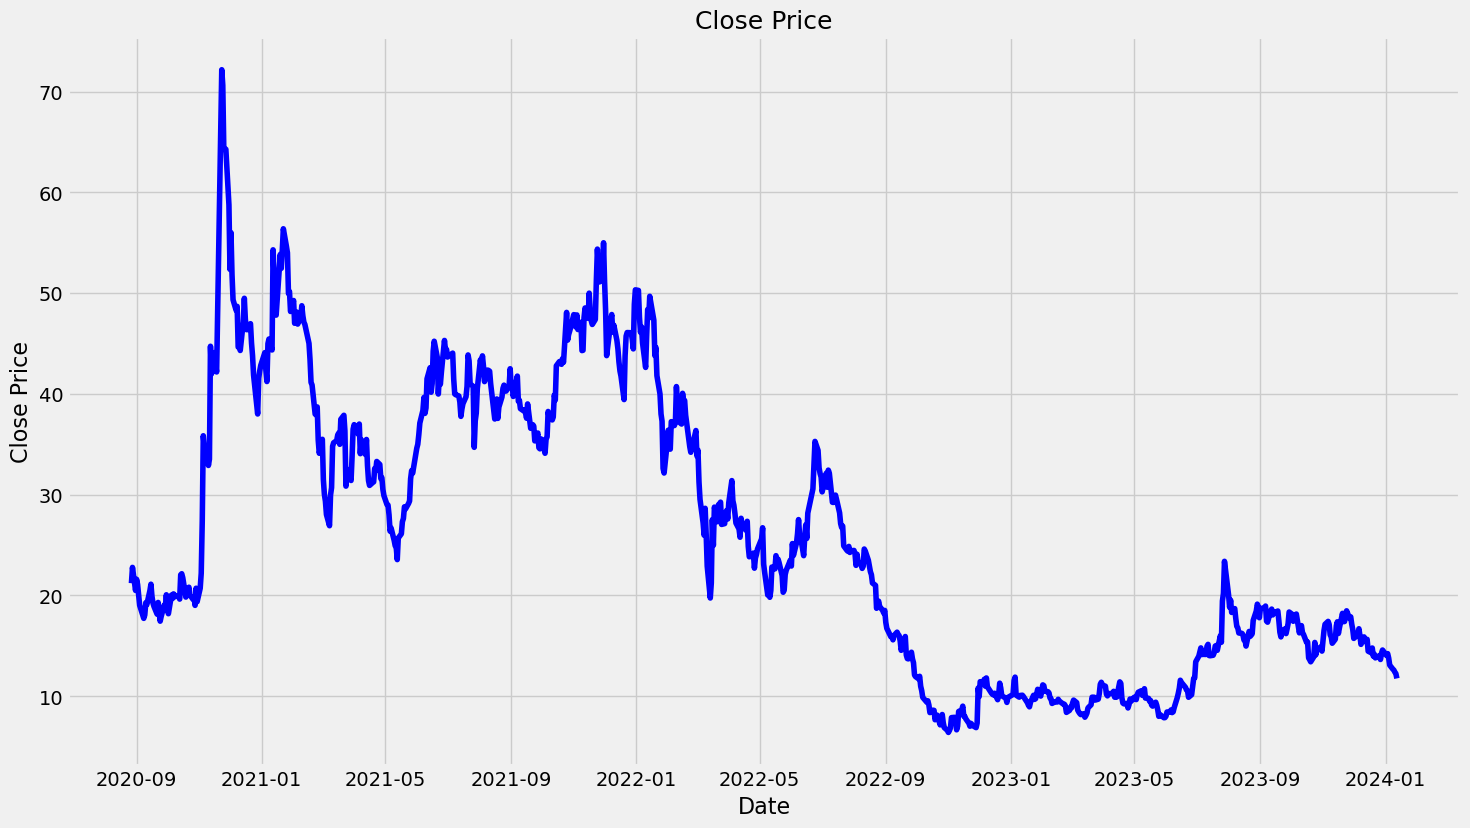

In [119]:
#Visualize the data. Visually show the close price

plt.figure(figsize = (16, 9))
plt.title("Close Price", fontsize=18)
plt.plot(XPEV["Close"], color="blue")
plt.xlabel("Date", fontsize=16)
plt.ylabel("Close Price", fontsize=16)
plt.show()

# Calculate Three Moving averages

In [146]:
#Calculate the short/fast exponential moving average

ShortEMA = XPEV.Close.ewm(span=5, adjust=False).mean()

#Calculate the Middle/Medium exponential moving average

MiddleEMA = XPEV.Close.ewm(span=21, adjust=False).mean()


#Calculate the long/slow exponential moving average

LongEMA = XPEV.Close.ewm(span=63, adjust=False).mean()

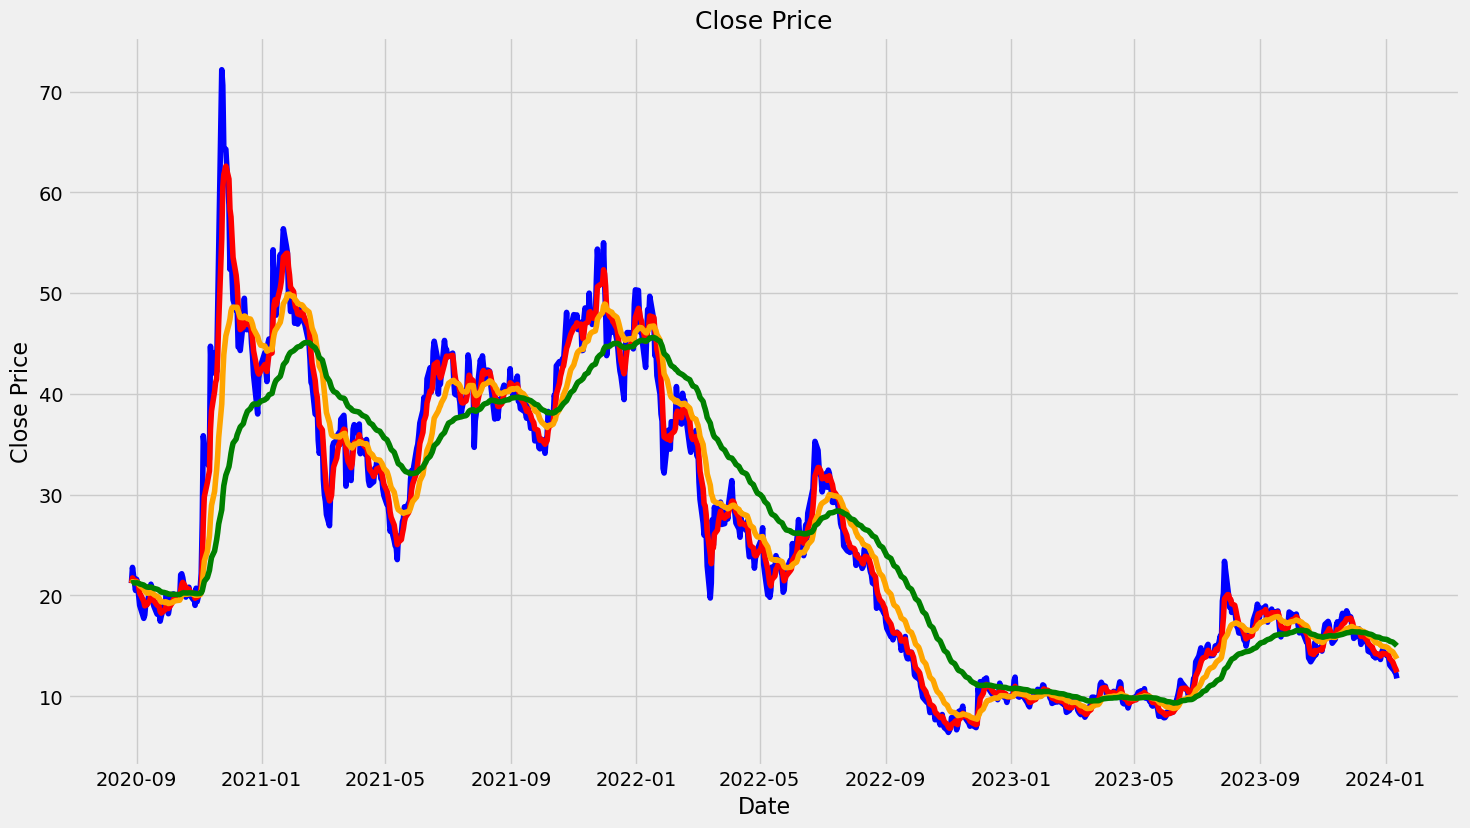

In [104]:
#Visualize the data. Visualize the closing price with the exponential moving averages

plt.figure(figsize = (16, 9))
plt.title("Close Price", fontsize=18)
plt.plot(XPEV["Close"], label="Close Price", color="blue")
plt.plot(ShortEMA, label="Short/Fast EMA", color="red")
plt.plot(MiddleEMA, label="Middle EMA", color="orange")
plt.plot(LongEMA, label="Long/Fast EMA", color="green")
plt.xlabel("Date", fontsize=16)
plt.ylabel("Close Price", fontsize=16)
plt.show()

In [124]:
# Add the data of exponential moving averages  to the dataset

XPEV["Short"] = ShortEMA
XPEV["Middle"] = MiddleEMA
XPEV["Long"] = LongEMA

In [147]:
# See the data after adding the exponential moving averages

XPEV

,Open,High,Low,Close,Adj Close,Volume,Short,Middle,Long,Buy
Date,,,,,,,,,,
2020-08-27,23.100000,25.000000,21.200001,21.219999,21.219999,82219700,21.219999,21.219999,21.219999,NaN
2020-08-28,23.980000,24.400000,22.020000,22.790001,22.790001,44847300,21.743333,21.362727,21.269062,NaN
2020-08-31,22.690001,22.790001,20.330000,20.500000,20.500000,20816000,21.328889,21.284297,21.245029,NaN
2020-09-01,20.980000,21.790001,20.100000,21.610001,21.610001,15291400,21.422593,21.313906,21.256434,NaN
2020-09-02,21.990000,22.000000,20.379999,21.090000,21.090000,9090100,21.311729,21.293551,21.251233,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-01-08,12.420000,12.810000,12.290000,12.700000,12.700000,11094100,13.392192,14.408480,15.377309,NaN
2024-01-09,12.520000,12.730000,12.470000,12.600000,12.600000,8103100,13.128128,14.244073,15.290518,NaN
2024-01-10,12.450000,12.550000,12.250000,12.400000,12.400000,10672600,12.885419,14.076430,15.200189,NaN


In [148]:
XPEV.index
XPEV

,Open,High,Low,Close,Adj Close,Volume,Short,Middle,Long,Buy
Date,,,,,,,,,,
2020-08-27,23.100000,25.000000,21.200001,21.219999,21.219999,82219700,21.219999,21.219999,21.219999,NaN
2020-08-28,23.980000,24.400000,22.020000,22.790001,22.790001,44847300,21.743333,21.362727,21.269062,NaN
2020-08-31,22.690001,22.790001,20.330000,20.500000,20.500000,20816000,21.328889,21.284297,21.245029,NaN
2020-09-01,20.980000,21.790001,20.100000,21.610001,21.610001,15291400,21.422593,21.313906,21.256434,NaN
2020-09-02,21.990000,22.000000,20.379999,21.090000,21.090000,9090100,21.311729,21.293551,21.251233,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-01-08,12.420000,12.810000,12.290000,12.700000,12.700000,11094100,13.392192,14.408480,15.377309,NaN
2024-01-09,12.520000,12.730000,12.470000,12.600000,12.600000,8103100,13.128128,14.244073,15.290518,NaN
2024-01-10,12.450000,12.550000,12.250000,12.400000,12.400000,10672600,12.885419,14.076430,15.200189,NaN


In [155]:
# Create the function to buy and sell the stock

def buy_sell_function(Data):
    buy_list = []
    sell_list = []
    flag_long=False
    flag_short = False
    
    for i in range (0, len(Data)):
        if Data["Middle"][i]<Data["Long"][i] and Data["Short"][i]<Data["Middle"][i] and flag_long==False and flag_short==False:
            buy_list.append(XPEV["Close"][i])
            sell_list.append(np.nan)
            flag_short = True
            
        elif flag_short==True and Data["Short"][i]>Data["Middle"][i]:
            sell_list.append(Data["Close"][i])
            buy_list.append(np.nan)
            flag_short=False
            
        elif Data["Middle"][i]>XPEV["Long"][i] and Data["Short"][i]>Data["Middle"][i] and flag_long==False:
            buy_list.append(np.nan)
            flag_long = True
            
        elif flag_long==True and Data["Short"][i]<Data["Middle"][i]:
            sell_list.append(XPEV["Close"][i])
            buy_list.append(np.nan)
            flag_long=False
            
        else:
            buy_list.append(np.nan)
            sell_list.append(np.nan)
            
    return(buy_list, sell_list)

In [156]:
# Add the buy and sell signals to the dataset

XPEV["Buy"]=buy_sell_function(XPEV)[0]
XPEV["Sell"]=buy_sell_function(XPEV)[1]

ValueError: Length of values (833) does not match length of index (850)

KeyError: 'Sell'

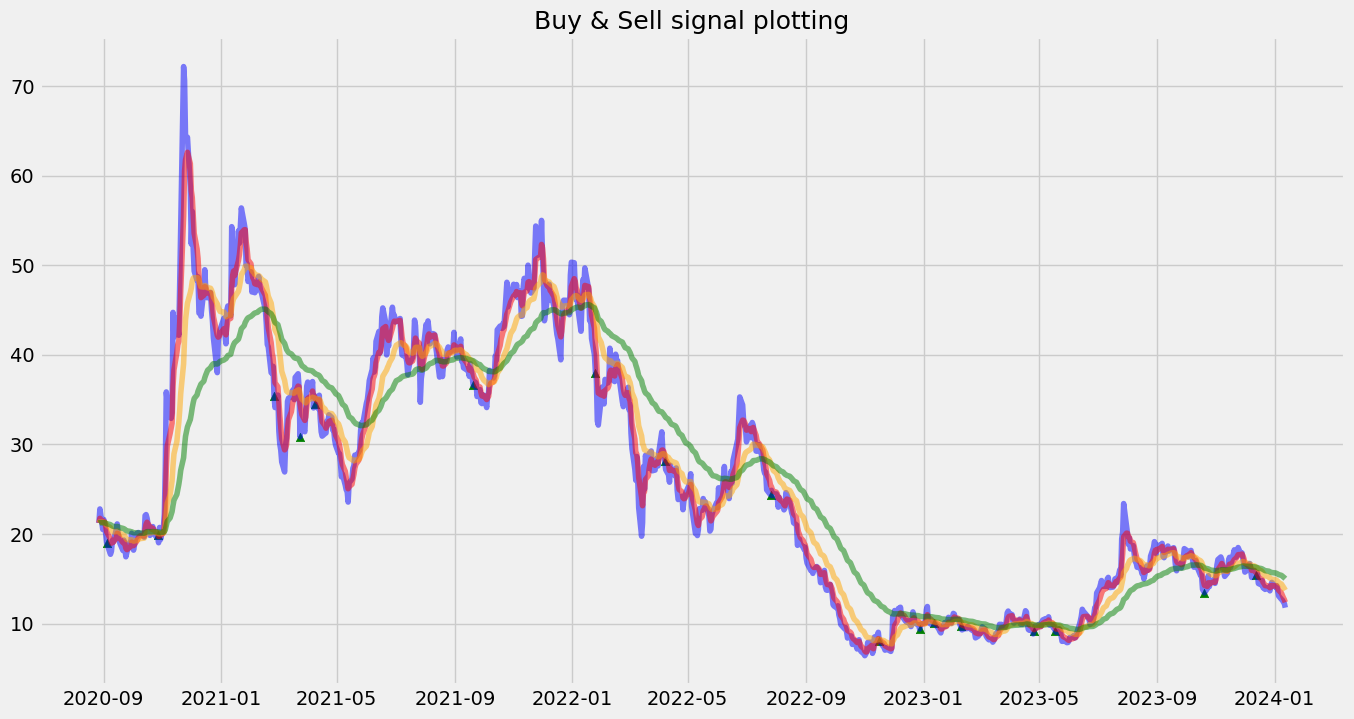

In [157]:
# Visually see the Stock buy & sell signals

plt.figure(figsize = (15, 8))
plt.title("Buy & Sell signal plotting", fontsize=18)
plt.plot(XPEV["Close"], label="Close Price", color="blue", alpha=0.5)
plt.plot(ShortEMA, label="Short/Fast EMA", color="red", alpha=0.5)
plt.plot(MiddleEMA, label="Middle EMA", color="orange", alpha=0.5)
plt.plot(LongEMA, label="Long/Fast EMA", color="green", alpha=0.5)
plt.scatter(XPEV.index, XPEV["Buy"], color="green", marker="^", alpha=1)
plt.scatter(XPEV.index, XPEV["Sell"], color="red", marker="v", alpha=1)
plt.xlabel("Date", fontsize=16)
plt.ylabel("Close Price", fontsize=16)
plt.show()